# BERTopic comparison based on clustering methods 

The goal of this file is to compare clustering methods with BERTopic. 

## Data

In [57]:
#Directories
DATA_PHILO = "C:/Users/jacob/OneDrive - Université Laval/biophilo/Data/pybiblio/SPECIALIZED PHILOSOPHY OF BIOLOGY/articles_special_philo_bio_reformat.csv"
PATH_TO_VIZ = r"C:/Users/jacob/OneDrive - Université Laval/biophilo/Visualisation"

# Packages to import. 
import pandas as pd 
import numpy as np
import datamapplot

from sentence_transformers import SentenceTransformer
from bertopic import BERTopic
from umap import UMAP

In [58]:
df = pd.read_csv("C:/Users/jacob/OneDrive - Université Laval/biophilo/Data/pybiblio/SPECIALIZED PHILOSOPHY OF BIOLOGY/articles_special_philo_bio_reformat.csv")
df = df.fillna("NULL")
df

...1    citing_id                  citing_doi   pii pubmed_id  \
0        0  85214130018  10.1007/S10539-024-09975-9  NULL      NULL   
1        1  85213705399  10.1007/S10539-024-09978-6  NULL      NULL   
2        2  85213504854  10.1007/S10539-024-09977-7  NULL      NULL   
3        3  85212923885  10.1007/S10539-024-09976-8  NULL      NULL   
4        4  85211818588  10.1007/S10539-024-09974-W  NULL      NULL   
...    ...          ...                         ...   ...       ...   
4282    59  51649148197          10.1007/BF02423834  NULL      NULL   
4283    60  51249172897          10.1007/BF02423832  NULL      NULL   
4284    61  51249171339          10.1007/BF02423831  NULL      NULL   
4285    62   2342585303          10.1007/BF02426629  NULL      NULL   
4286    63      2459750          10.1007/BF02426630  NULL      NULL   

                                           citing_title subtype  \
0     INTERVENTIONISM AS A DANGEROUSLY ANTHROPOCENTR...      AR   
1     DEFENDING THE IMPORTANCE OF LINEAGE-FORMING RE...      AR   
2     THE GRADATIONAL NATURE OF BIOLOGICAL FUNCTIONS...      AR   
3     CORRECTION TO: A CO-CONSTITUTIVE ANALYSIS OF I...      ER   
4     CORRECTION TO: CULTURAL INTELLIGENCE, SHARED I...      ER   
...                                                 ...     ...   
4282  MARXISM AND HUMAN SOCIOBIOLOGY: A REPLY TO ZHA...      RE   
4283  SPECIES OF THOUGHT: A COMMENT ON EVOLUTIONARY ...      AR   
4284  MODELING IN THE MUSEUM: ON THE ROLE OF REMNANT...      AR   
4285    DOES EVOLUTIONARY BIOLOGY CONTRIBUTE TO ETHICS?      AR   
4286        THE CRUCIAL EXPERIMENT OF WILHELM JOHANNSEN      AR   

     subtypeDescription         creator                afid  ... pageRange  \
0               ARTICLE     KOPERSKI P.            60110624  ...      NULL   
1               ARTICLE        ZHANG M.            60009860  ...      NULL   
2               ARTICLE       ŠUSTAR P.            60077673  ...      NULL   
3               ERRATUM  MCCONWELL A.K.            60033461  ...      NULL   
4               ERRATUM        KOREŇ L.            60000474  ...      NULL   
...                 ...             ...                 ...  ...       ...   
4282             REVIEW        KEITA L.            60072930  ...     79-83   
4283            ARTICLE       WILSON D.            60020273  ...     37-62   
4284            ARTICLE    GRIESEMER J.            60014439  ...      3-36   
4285            ARTICLE      BATESON P.            60031101  ...   287-301   
4286            ARTICLE  ROLL-HANSEN N.  60010348;100444942  ...   303-329   

                                            description  \
0     The article presents and critically discusses ...   
1     Charbonneau (2014) and Papale (2021) challenge...   
2     In this paper, we consider whether a straightf...   
3     In the sentence beginning “Case 3 Rerun. And f...   
4     Cultural intelligence, shared intentionality a...   
...                                                 ...   
4282                                               NULL   
4283  The primary outcome of natural selection is ad...   
4284  Accounts of the relation between theories and ...   
4285  Human propensities that are the products of Da...   
4286  I call an experiment "crucial" when it makes p...   

                                           authkeywords citedby_count  \
0     ANIMAL SUFFERING | ANTHROPOCENE | ENVIRONMENTA...             0   
1     ECOLOGICAL INHERITANCE | EVOLUTION BY NATURAL ...             0   
2     CAUSAL ROLE | DE NOVO GENES | GENOME BIOLOGY |...             0   
3                                                  NULL             0   
4                                                  NULL             0   
...                                                 ...           ...   
4282  ECONOMIC GROWTH | FREE-MARKET ECONOMIES | MARX...             2   
4283  ADAPTATION | EVOLUTIONARY EPISTEMOLOGY | MENTA...            29   
4284  ECOLOGY | EVOLUTION | JOSEPH GRINNELL |

In [59]:
df_cleaned  = df[df['description'] != 'NULL']
df_cleaned  = df_cleaned[df_cleaned['subtypeDescription'] == 'ARTICLE']
df_cleaned  = df_cleaned[df_cleaned['citing_journal'] == 'BIOLOGY AND PHILOSOPHY']
df_cleaned = df_cleaned.reset_index(drop=True)
df_cleaned

...1    citing_id                  citing_doi   pii pubmed_id  \
0        0  85214130018  10.1007/S10539-024-09975-9  NULL      NULL   
1        1  85213705399  10.1007/S10539-024-09978-6  NULL      NULL   
2        2  85213504854  10.1007/S10539-024-09977-7  NULL      NULL   
3        5  85211778719  10.1007/S10539-024-09972-Y  NULL      NULL   
4        6  85209758913  10.1007/S10539-024-09969-7  NULL      NULL   
...    ...          ...                         ...   ...       ...   
1135    58  51649149432          10.1007/BF02423833  NULL      NULL   
1136    60  51249172897          10.1007/BF02423832  NULL      NULL   
1137    61  51249171339          10.1007/BF02423831  NULL      NULL   
1138    62   2342585303          10.1007/BF02426629  NULL      NULL   
1139    63      2459750          10.1007/BF02426630  NULL      NULL   

                                           citing_title subtype  \
0     INTERVENTIONISM AS A DANGEROUSLY ANTHROPOCENTR...      AR   
1     DEFENDING THE IMPORTANCE OF LINEAGE-FORMING RE...      AR   
2     THE GRADATIONAL NATURE OF BIOLOGICAL FUNCTIONS...      AR   
3                                     SEX ELIMINATIVISM      AR   
4     THRESHOLDS OF HUMAN COOPERATION: CONSTRUCTING ...      AR   
...                                                 ...     ...   
1135                        CAN ABSTRACTIONS BE CAUSES?      AR   
1136  SPECIES OF THOUGHT: A COMMENT ON EVOLUTIONARY ...      AR   
1137  MODELING IN THE MUSEUM: ON THE ROLE OF REMNANT...      AR   
1138    DOES EVOLUTIONARY BIOLOGY CONTRIBUTE TO ETHICS?      AR   
1139        THE CRUCIAL EXPERIMENT OF WILHELM JOHANNSEN      AR   

     subtypeDescription              creator                afid  ...  \
0               ARTICLE          KOPERSKI P.            60110624  ...   
1               ARTICLE             ZHANG M.            60009860  ...   
2               ARTICLE            ŠUSTAR P.            60077673  ...   
3               ARTICLE           WATKINS A.   60032179;60010261  ...   
4               ARTICLE  GONZALEZ-CABRERA I.            60025525  ...   
...                 ...                  ...                 ...  ...   
1135            ARTICLE         JOHNSON D.M.            60033420  ...   
1136            ARTICLE            WILSON D.            60020273  ...   
1137            ARTICLE         GRIESEMER J.            60014439  ...   
1138            ARTICLE           BATESON P.            60031101  ...   
1139            ARTICLE       ROLL-HANSEN N.  60010348;100444942  ...   

     pageRange                                        description  \
0         NULL  The article presents and critically discusses ...   
1         NULL  Charbonneau (2014) and Papale (2021) challenge...   
2         NULL  In this paper, we consider whether a straightf...   
3         NULL  The concept of biological sex guides research,...   
4         NULL  Shared intentionality is key for understanding...   
...        ...                                                ...   
1135     63-77  The Empiricist or Lockean view says natural ki...   
1136     37-62  The primary outcome of natural selection is ad...   
1137      3-36  Accounts of the relation between theories and ...   
1138   287-301  Human propensities that are the products of Da...   
1139   303-329  I call an experiment "crucial" when it makes p...   

                                           authkeywords citedby_count  \
0     ANIMAL SUFFERING | ANTHROPOCENE | ENVIRONMENTA...             0   
1     ECOLOGICAL INHERITANCE | EVOLUTION BY NATURAL ...             0   
2     CAUSAL ROLE | DE NOVO GENES | GENOME BIOLOGY |...             0   
3     ANTIREALISM | BIOLOGICAL SEX | SEX CONTEXTUALI...             0   
4     COGNITIVE EVOLUTION | COOPERATIVE BREEDING | D...             0   
...                                                 ...           ...   
1135  ABSTRACTIONS | CAUSALITY | ECOLOGICAL NICHES |...            11   
1136  ADAPTATION | EVOLUTIONARY EPISTEMOLOGY | MENTA...   

In [60]:
docs = df_cleaned.description.to_list()  
columns_to_combine = ['creator', 'citing_year', 'citing_title']
df_cleaned['combined'] = df_cleaned[columns_to_combine].apply(lambda row: ', '.join(map(str, row)), axis=1)
node_text = df_cleaned.combined.to_list()

In [61]:
from sentence_transformers import SentenceTransformer
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = embedding_model.encode(docs, show_progress_bar=True)

Batches:   0%|          | 0/36 [00:00<?, ?it/s]

## Clustering methods 

In [77]:
from bertopic import BERTopic
from hdbscan import HDBSCAN
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer

n_cluster = [5, 10, 20, 30]
clusterers = [KMeans(n_clusters=n, random_state=42) for n in n_cluster]

umap_model = UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine', random_state=30)
reduced_embeddings = UMAP(n_neighbors=15, n_components= 2, min_dist=0.0, metric='cosine', random_state=30).fit_transform(embeddings)

vectorizer_model = CountVectorizer(stop_words="english")

In [ ]:
from bertopic import BERTopic

topic_models = []


for i, clusterer in enumerate(clusterers):
    topic_model = BERTopic(
        umap_model=umap_model,                     # no need now
        hdbscan_model=clusterer,             
        vectorizer_model=vectorizer_model,
        verbose=True,
        calculate_probabilities=True
    )
    topics, probs = topic_model.fit_transform(docs, embeddings)
    topic_models.append(topic_model)


2025-04-25 15:36:05,780 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-25 15:36:06,617 - BERTopic - Dimensionality - Completed ✓
2025-04-25 15:36:06,618 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-25 15:36:06,640 - BERTopic - Cluster - Completed ✓
2025-04-25 15:36:06,643 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-04-25 15:36:06,820 - BERTopic - Representation - Completed ✓
2025-04-25 15:36:06,970 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-25 15:36:07,981 - BERTopic - Dimensionality - Completed ✓
2025-04-25 15:36:07,982 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-25 15:36:08,004 - BERTopic - Cluster - Completed ✓
2025-04-25 15:36:08,007 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-04-25 15:36:08,203 - BERTopic - Representation - Completed ✓
2025-04-25 1

In [73]:
all_labels = []

for model in topic_models:
    doc_info = model.get_document_info(docs)
    labels = doc_info["Name"].values  # or "Topic" if you prefer the number instead of the name
    all_labels.append(labels)


In [88]:
all_labels

[array(['2_biological_biology_argue_paper',
        '1_evolutionary_biology_causal_theory',
        '1_evolutionary_biology_causal_theory', ...,
        '2_biological_biology_argue_paper',
        '3_cultural_social_human_evolutionary',
        '1_evolutionary_biology_causal_theory'], dtype=object),
 array(['5_biological_biology_models_science',
        '2_evolutionary_theory_biology_paper',
        '4_evolutionary_causal_explanations_information', ...,
        '5_biological_biology_models_science',
        '0_cultural_social_human_evolution',
        '2_evolutionary_theory_biology_paper'], dtype=object),
 array(['12_crisprcas_biology_biological_science',
        '3_contingency_evolutionary_theory_causal',
        '10_selection_information_signals_natural', ...,
        '11_models_race_ecology_biological',
        '17_moral_welfare_evolutionary_naturalistic',
        '9_evolutionary_science_research_reproductive'], dtype=object),
 array(['11_crisprcas_systems_immune_life',
        '13_

In [72]:
print(topic_models[0])

BERTopic(calculate_probabilities=True, ctfidf_model=ClassTfidfTransformer(...), embedding_model=None, hdbscan_model=KMeans(...), language=english, low_memory=False, min_topic_size=10, n_gram_range=(1, 1), nr_topics=None, representation_model=None, seed_topic_list=None, top_n_words=10, umap_model=UMAP(...), vectorizer_model=CountVectorizer(...), verbose=True, zeroshot_min_similarity=0.7, zeroshot_topic_list=None)


  0%|          | 0/500 [00:00<?, ?it/s]

Resetting positions to accord with alignment


(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

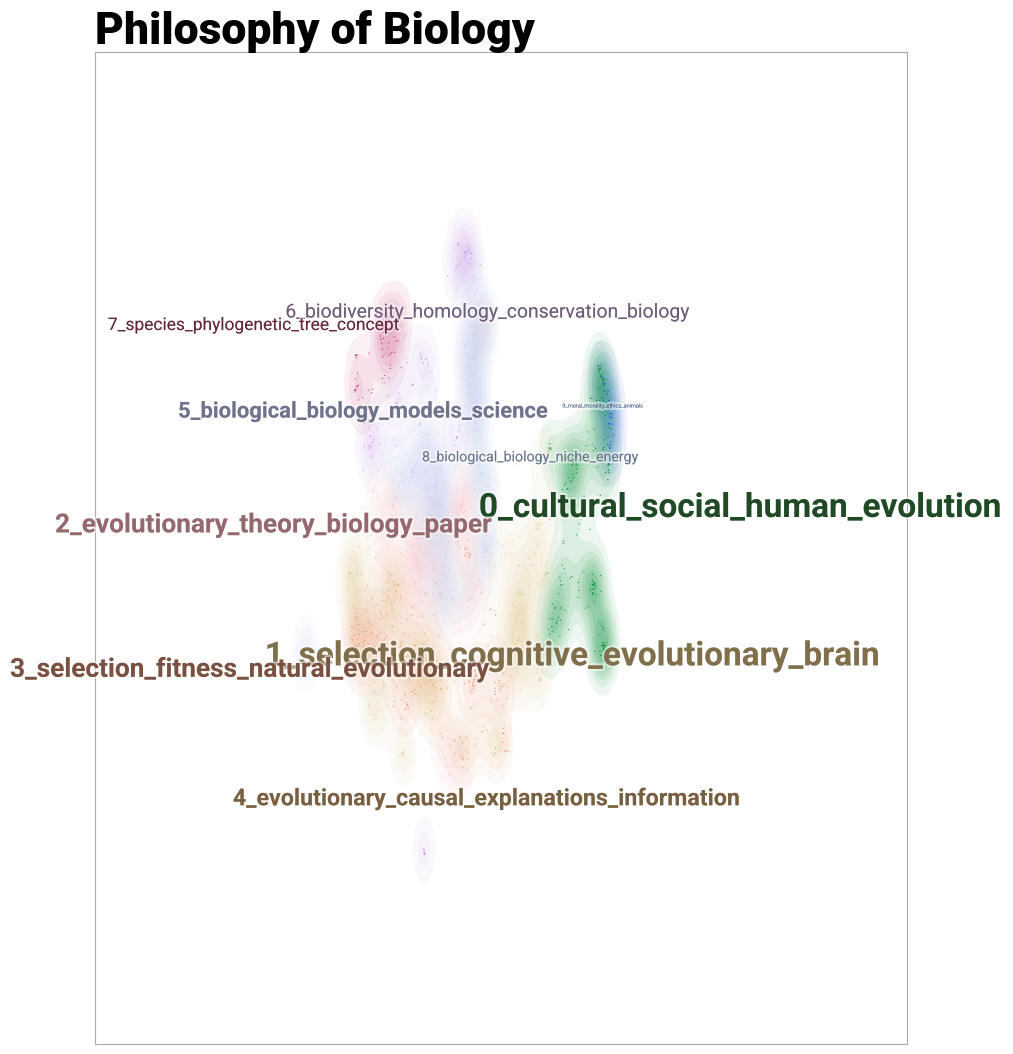

In [80]:
datamapplot.create_plot(
    reduced_embeddings,
    all_labels[1],
    label_over_points=True, 
    dynamic_label_size=True,
    title = f"Philosophy of Biology",
    point_size=1, 
    marker_type="p", 
    force_matplotlib=True
)

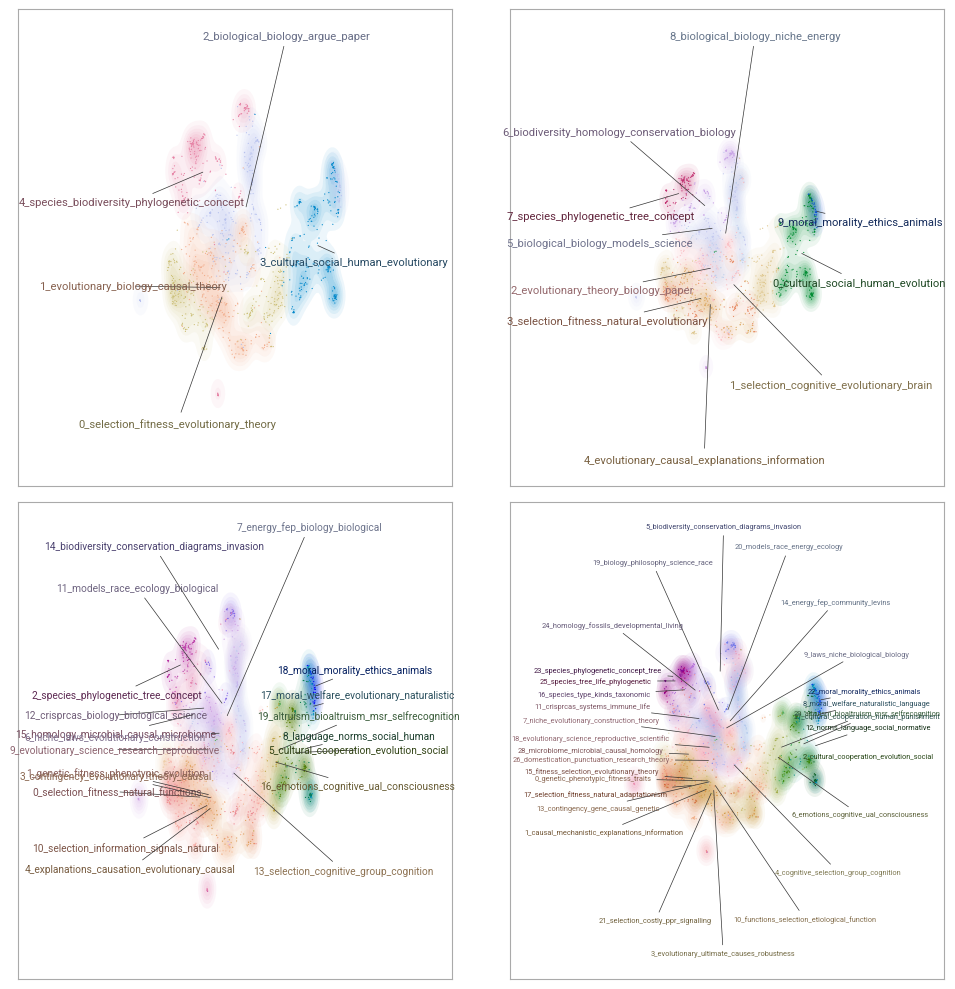

In [95]:
import matplotlib.pyplot as plt
import datamapplot as dmp
import numpy as np

# Assume:
# - reduced_embeddings = your UMAP output
# - all_labels = list of label arrays, one per model
# - model_names = list of names for each model

n_models = len(all_labels)
n_cols = 2  # for a 4x4 grid
n_rows = (n_models + n_cols - 1) // n_cols  # round up

# Set up figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows))

# Flatten axes for easy indexing
axes = axes.flatten()

# Loop through all models/labels
for i, labels in enumerate(all_labels):
    ax = axes[i]
    
    dmp.create_plot(
        reduced_embeddings,
        labels,
        label_over_points=False, 
        dynamic_label_size=False,
        point_size=1, 
        marker_type="p",
        force_matplotlib=True,
        ax=ax  # 🔥 plot in the correct subplot
    )

# Hide any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



In [69]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Assuming you have already fit UMAP externally:
umap_model = UMAP(n_neighbors=15, n_components=2, metric='cosine', random_state=42)
umap_embeddings = umap_model.fit_transform(embeddings)

topic_models = [topic_models[0], topic_models[1], topic_models[2], topic_models[3]]  # however many you have
model_names = [f"KMeans-{n}" for n in n_cluster]

# Grid settings
n_models = len(topic_models)
n_cols = 2
n_rows = (n_models + n_cols - 1) // n_cols

fig = make_subplots(rows=n_rows, cols=n_cols, subplot_titles=model_names)

# Iterate and add each model's visualization
for i, model in enumerate(topic_models):
    row = i // n_cols + 1
    col = i % n_cols + 1
    
    # 🛑 Corrected to use the same umap_embeddings
    doc_fig = model.visualize_documents(docs, embeddings=umap_embeddings, hide_annotations=True)
    
    for trace in doc_fig.data:
        fig.add_trace(trace, row=row, col=col)

fig.update_layout(
    height=400 * n_rows, 
    width=500 * n_cols, 
    title_text="Comparison of BERTopic Clusterings",
    showlegend=False
)

fig.show()
